# Python Image Library (PIL)

source: http://effbot.org/imagingbook/introduction.htm

In [12]:
from PIL import Image

path = "/Users/inshique/Desktop/DL_Amz_Project/data/keras_img/test/Home & Kitchen/B00BNOYQQG.jpg"
im = Image.open(path)

''' 
same as:
import PIL 
PIL.Image.open(path)
'''

' \nsame as:\nimport PIL \nPIL.Image.open(path)\n'

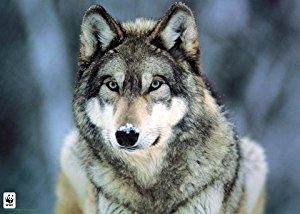

In [15]:
im

In [11]:
im.format, im.size, im.mode

('JPEG', (300, 214), 'RGB')

In [16]:
im.show() # prints out in a separate window 

### Cropping

The region is defined by a 4-tuple, where coordinates are **(left, upper, right, lower)**. The Python Imaging Library uses a coordinate system with (0, 0) in the **upper left corner**. Also note that coordinates refer to positions between the pixels, so the region in the above example is exactly 300x300 pixels.

In [62]:
im.size

(300, 214)

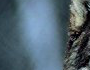

In [163]:
box = (10, 30, 100, 100)
region = im.crop(box)
region

In [52]:
im_resized = im.resize((200,100))

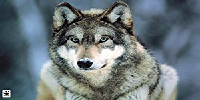

In [53]:
im_resized

In [56]:
im_resized.size, im_resized.format, im_resized.mode
# .resize squeezes the image

((200, 100), None, 'RGB')

In [64]:
im.size

(300, 214)

In [65]:
def crop_img_noresize(img):

    width, height = img.size   # Get dimensions 
    new_width, new_height = 244, 244 

    left = (width - new_width)/2
    top = (height - new_height)/2
    right = (width + new_width)/2
    bottom = (height + new_height)/2

    return im.crop((left, top, right, bottom))

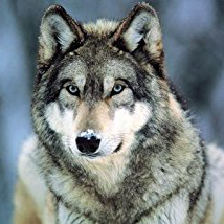

In [3]:
def crop_img(img):
    '''
    Crop the image into size x size 
    crop((left, upper, right, lower))
    '''
    size = 224 
    if img.width == img.height:
        return img.resize((size,size,))
    
    elif img.width > img.height: # if image is wider, crop it 
        w = int(size * img.width/img.height) # resize in the same ratio
        img = img.resize((w,size,))        
        return img.crop(((w-size)/2,0,(w+size)/2,size,))
    
    else:# img.width < img.height: # if image is longer, crop it 
        h = int(size * img.height/img.width)
        img = img.resize((size,h,))
        return img.crop((0,(h-size)/2,size,(h+size)/2,))

#crop_img(im.resize((324,324)))
crop_img(im)

In [161]:
# shows that we successfully made it do 244 x 244 
print("before: " , im.size)
print("after:  ", crop_img(im).size)

before:  (300, 214)
after:   (224, 224)


## Vectoring images 

**** Note the difference between PIL's Image and Keras' image 

In [193]:
from keras.preprocessing import image
import numpy as np
from keras.applications.resnet50 import preprocess_input, decode_predictions

x = image.img_to_array(im)
print(x.shape)
x = np.expand_dims(x, axis=0)
print(x.shape)
x = preprocess_input(x)
print(x.shape)

(214, 300, 3)
(1, 214, 300, 3)
(1, 214, 300, 3)
